# Preparing the data for analysis

## Stanford Open Policing Project dataset

### 2. Introduction to the dataset

Let's start by introducing the data. You'll be working with a dataset of traffic stops by police officers that was collected by the Stanford Open Policing Project. They've collected data from 31 US states, but in this course you'll be focusing on data from the state of Rhode Island. For size reasons, some of the columns and rows have been removed, but you can download the full dataset for any of the 31 states from the project's website.

### 3. Preparing the data

This first chapter is about preparing the data for analysis. Before beginning an analysis, it's critical that you first examine the data to make sure that you understand it, and then clean the data, to make working with it a more efficient process. As always, we'll start by importing pandas as pd. We'll use the read_csv() function to read in the dataset from a file, and then store it in a DataFrame called ri, which stands for Rhode Island. We'll use the head() method in order to take a quick glance at the DataFrame, though there are many more columns than can fit on this screen. Each row represents a single traffic stop. You'll notice that the county_name column contains NaN values, which indicate missing values. These are often values that were not collected during the data gathering process, or are irrelevant for that particular row.

In [1]:
import pandas as pd
ri = pd.read_csv("data/police.csv")
ri.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


### 4. Locating missing values (1)

It's important that you locate missing values so that you can proactively decide how to handle them. You may recall that the isnull() method generates a DataFrame of True and False values: True if the element is missing, and False if it's not.

In [2]:
ri.isna()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91737,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91738,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91739,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


### 5. Locating missing values (2)

One useful trick is to take the sum of this DataFrame, which outputs a count of the number of missing values in each column. How does that calculation work? Well, the sum() method calculates the sum of each column by default, and True values are treated as ones, while False values are treated as zeros.

In [3]:
ri.isna().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

### 6. Dropping a column

Let's compare these missing value counts to the DataFrame's shape. You'll notice that the county_name column contains as many missing values as there are rows, meaning that it only contains missing values. Since it contains no useful information, this column can be dropped using the drop() method. Besides specifying the column name, you need to specify that you're dropping from the columns axis, and that you want the operation to occur in place, which avoids an assignment statement.

In [4]:
ri.drop("county_name",axis=1,inplace=True)

### 7. Dropping rows

Finally, let's take a look at one more method related to missing values. The dropna() method is a great way to drop rows based on the presence of missing values in that row. For example, let's pretend that the stop_date and stop_time columns are critical to our analysis, and thus a row is useless to us without that data. We can tell pandas to drop all rows that have a missing value in either the stop_date or stop_time column. Because we specified a subset, the dropna() method only takes these two columns into account when deciding which rows to drop.

In [5]:
ri.dropna(subset=["stop_date","stop_time"],inplace=True)

### 8. Let's practice!

Now it's your turn to practice using these functions to examine and clean this dataset.

## Examining the dataset

<p>Throughout this course, you'll be analyzing a dataset of traffic stops in Rhode Island that was collected by the <a href="https://openpolicing.stanford.edu/" target="_blank" rel="noopener noreferrer">Stanford Open Policing Project</a>.</p>
<p>Before beginning your analysis, it's important that you familiarize yourself with the dataset. In this exercise, you'll read the dataset into pandas, examine the first few rows, and then count the number of missing values.</p>

In [9]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv("data/police.csv")

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

In [10]:
ri.isna().mean()

state                 0.000000
stop_date             0.000000
stop_time             0.000000
county_name           1.000000
driver_gender         0.056736
driver_race           0.056703
violation_raw         0.056703
violation             0.056703
search_conducted      0.000000
search_type           0.963953
stop_outcome          0.056703
is_arrested           0.056703
stop_duration         0.056703
drugs_related_stop    0.000000
district              0.000000
dtype: float64

## Dropping columns

<p>Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the DataFrame, to make it easier for you to focus on the remaining columns.</p>
<p>In this exercise, you'll drop the <code>county_name</code> column because it only contains missing values, and you'll drop the <code>state</code> column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information. The number of missing values in each column has been printed in the IPython Shell for you.</p>

In [11]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(["county_name", "state"], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 15)
(91741, 13)


## Dropping rows

<p>When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.</p>
<p>During this course, the <code>driver_gender</code> column will be critical to many of your analyses. Because only a small fraction of rows are missing <code>driver_gender</code>, we'll drop those rows from the dataset.</p>

In [12]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=["driver_gender"], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isna().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


## Using proper data types

### 1. Using proper data types

In the last set of exercises, you began cleaning the dataset by removing columns and rows that will not be useful for your upcoming analyses. Now, we're going to continue cleaning the dataset by ensuring that each of the columns has the proper data type.

### 2. Examining the data types

Let's take a look at the dtypes attribute of the DataFrame. Every Series has a data type, which was automatically inferred by pandas when it was reading in the CSV file. As you can see, the only data types currently in use are object and bool. The object data type usually means that a Series is made up of Python strings, though it can indicate the presence of other Python objects such as lists. The bool data type is short for Boolean, which means that a Series is made up of True and False values. pandas also supports other data types, such as int for integers, float for floating point values, datetime for dates and times, and category for categorical variables.

In [13]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

### 3. Why do data types matter?

But why does the data type of a pandas Series even matter? Data types matter mostly because they affect which operations you can perform on a given Series. In particular, it's beneficial not to store data as strings when possible. For example, mathematical operations can be performed on ints and floats, but those operations will fail if the numbers are stored as strings. The datetime type enables a rich set of date-based attributes and methods that are not possible with strings. The category data type results in less memory usage and faster processing than strings. And the bool data type enables logical and mathematical operations that we'll use during the course.

### 4. Fixing a data type

Let's see an example of how you might fix an improper data type. We'll imagine a DataFrame named apple that has a Series named price, which stores the closing price of Apple company stock each day. You can check the data type of the price Series using its dtype attribute. It reports a dtype of "O", which stands for object and means that the numbers are actually stored as strings. To change the data type of the price Series from object to float, you can use the astype() method, to which you pass the new data type as an argument. Then, you simply overwrite the original Series. If you check the data type again, you can see that it has changed to float. You might have noticed that on the right side of the equals sign, I used dot notation to refer to the price Series, rather than bracket notation. They mean the same thing, but I'll be using dot notation throughout this course, because I find that dot notation makes pandas code more readable. However, it's worth noting that you must use bracket notation on the left side of an assignment statement to create a new Series or overwrite an existing Series.

In [15]:
apple = pd.read_csv("data/apple.csv",index_col=0)
apple

,date,time,price
0,2/13/18,16:00,164.34
1,2/14/18,16:00,167.37
2,2/15/18,16:00,172.99


In [16]:
apple.dtypes

date      object
time      object
price    float64
dtype: object

### 5. Let's practice!

It's now time for you to practice examining and fixing data types in our dataset.

## Fixing a data type

<p>We saw in the previous exercise that the <code>is_arrested</code> column currently has the <code>object</code> data type. In this exercise, we'll change the data type to <code>bool</code>, which is the most suitable type for a column containing <code>True</code> and <code>False</code> values.</p>
<p>Fixing the data type will enable us to use mathematical operations on the <code>is_arrested</code> column that would not be possible otherwise.</p>

In [14]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype("bool")

# Check the data type of 'is_arrested'
print(ri["is_arrested"].dtypes)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
bool


## Creating a DatetimeIndex

### 1. Creating a DatetimeIndex

In the last exercise, you fixed the data type of the is_arrested column. Now, we're going to build a DatetimeIndex for our DataFrame.

### 2. Using datetime format

Let's take a look at the head of the dataset again. As you can see, the date and time of each traffic stop are stored in separate columns, both of which are object columns. Because we'll be using stop_date and stop_time in our analysis, we're going to combine these two columns into a single column and then convert it to pandas' datetime format. This will be beneficial because unlike object columns, datetime columns provide date-based attributes that will make our analysis easier.

In [17]:
ri.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [18]:
ri.dtypes[:3]

stop_date        object
stop_time        object
driver_gender    object
dtype: object

### 3. Combining object columns

Let's see an example of this using the apple stock price DataFrame from the previous video. Date and time are stored in separate columns, so the first task is to combine these two columns using a string method. As you might remember from previous courses, string methods, such as replace(), are Series methods available via the str accessor. In this example, we're replacing the forward slash in the date column with a dash. It outputs a new Series in which the string replacement has been made, though this change is temporary since we haven't saved the new Series. Anyway, to combine the columns, we're going to use the str dot cat() method, which is short for concatenate. We'll concatenate the date column with the time column, and tell pandas to separate them with a space, storing the result in a Series object named combined. You can see that the combined Series contains both the date and time. It's still an object column, but it's now ready for conversion to datetime format.

In [19]:
apple

,date,time,price
0,2/13/18,16:00,164.34
1,2/14/18,16:00,167.37
2,2/15/18,16:00,172.99


In [20]:
combined = apple.date.str.cat(apple.time,sep=" ")

### 4. Converting to datetime format

To convert the combined Series to datetime format, you simply pass it to the to_datetime() function, and store the result in a new column. We didn't even need to specify that the original data was in month-day-year format, instead pandas just figured it out. Looking at the updated DataFrame, you can see that the new column contains both the date and time, and that it is stored in a more standard way. From the dtypes attribute, you can see that the new data type of the new column is datetime, instead of object.

In [21]:
apple["date_and_time"] = pd.to_datetime(combined)
apple

,date,time,price,date_and_time
0,2/13/18,16:00,164.34,2018-02-13 16:00:00
1,2/14/18,16:00,167.37,2018-02-14 16:00:00
2,2/15/18,16:00,172.99,2018-02-15 16:00:00


In [23]:
apple.dtypes

date                     object
time                     object
price                   float64
date_and_time    datetime64[ns]
dtype: object

### 5. Setting the index

One final step that we'll take is to set the datetime column as the index. That will make it easier to filter the DataFrame by date, plot the data by date, and so on. We'll use the set_index() method, and specify that the operation should occur in place to avoid an assignment statement. You can see that the default index has been replaced with the datetime column. And the index is now a special type called DatetimeIndex. As a reminder, when an existing column becomes the index, it is no longer considered to be one of the DataFrame columns.

In [24]:
apple.set_index("date_and_time",inplace=True)

In [25]:
apple

,date,time,price
date_and_time,,,
2018-02-13 16:00:00,2/13/18,16:00,164.34
2018-02-14 16:00:00,2/14/18,16:00,167.37
2018-02-15 16:00:00,2/15/18,16:00,172.99


### 6. Let's practice!

Now that you've seen how to create a DatetimeIndex for the apple DataFrame, you can practice these steps on our dataset of traffic stops. This is the final step before we begin our analysis of the dataset in the next chapter.

## Combining object columns

<p>Currently, the date and time of each traffic stop are stored in separate object columns: <code>stop_date</code> and <code>stop_time</code>.</p>
<p>In this exercise, you'll combine these two columns into a single column, and then convert it to <code>datetime</code> format. This will enable convenient date-based attributes that we'll use later in the course.</p>

In [26]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time,sep=" ")

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


## Setting the index

<p>The last step that you'll take in this chapter is to set the <code>stop_datetime</code> column as the DataFrame's index. By replacing the default index with a <code>DatetimeIndex</code>, you'll make it easier to analyze the dataset by date and time, which will come in handy later in the course!</p>

In [27]:
# Set 'stop_datetime' as the index
ri.set_index("stop_datetime", inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


# Exploring the relationship between gender and policing

## Do the genders commit different violations?

### 1. Do the genders commit different violations?

In the last chapter, we focused on preparing the traffic stops dataset for analysis. In this chapter, you'll use the dataset to explore the relationship between gender and policing, and you'll practice figuring out how to use pandas to answer specific questions.

### 2. Counting unique values (1)

Let's start by discussing a few methods that will help you with your analysis. The first method is value_counts(), which counts the unique values in a Series. It's best suited for a column that contains categorical rather than numerical data. For example, we can apply value_counts() to the stop_outcome column, which contains the outcome of each traffic stop. The results are displayed in descending order, so you can see that the most common outcome is a citation, also known as a ticket, and the second most common outcome is a warning.

In [28]:
ri["stop_outcome"].value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

### 3. Counting unique values (2)

Because value_counts() outputs a pandas Series, you can take the sum of this Series by simply adding the sum() method on the end. This is known as method chaining, a powerful technique we'll use throughout the course. The sum() of the value_counts() is actually equal to the number of rows in the DataFrame, which will be the case for any Series that has no missing values.

In [29]:
ri["stop_outcome"].value_counts().sum()

86536

### 4. Expressing counts as proportions

Rather than examining the raw counts, you might prefer to see the stop outcomes as proportions of the total. So if you wanted to know what percentage of traffic stops ended in a citation, you would divide the number of citations by the total number of outcomes and get 0.89, or 89%. Rather than doing these calculations manually, you can instead set the normalize parameter of value_counts() to be True, and it will output proportions instead of counts. Citations are 89%, warnings are 6%, driver arrests are 3%, and so on.

In [30]:
ri["stop_outcome"].value_counts(normalize=True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

### 5. Filtering DataFrame rows

Let's now take a look at the value_counts() for a different column, driver_race. You can see that there are five unique categories present. If you wanted to filter the DataFrame to only include drivers of a particular race, such as White, you would write that as a condition and put it inside brackets, as you've seen previously. We'll save the result in a new object. The shape of the new DataFrame is 61,870 rows, because that's the number of White drivers in the dataset, and 13 columns. You can now analyze this smaller DataFrame separately.

In [31]:
ri["driver_race"].value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

In [32]:
white = ri[ri["driver_race"] == "White"]
white.shape

(61870, 13)

In [34]:
white["stop_outcome"].value_counts(normalize=True)

Citation            0.902263
Warning             0.057508
Arrest Driver       0.024018
No Action           0.007031
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

### 6. Comparing stop outcomes for two groups

For example, you could repeat the analysis of stop outcomes, but focus on White drivers only. Like before, you select the stop_outcome column and then chain the value_counts() method on the end. You could compare these results with the outcomes for another race, such as Asian, simply by changing the condition inside the brackets and then repeating the calculation. If you compare these two sets of numbers, you can see that the stop outcomes are fairly similar for these two groups.

In [37]:
asian = ri[ri["driver_race"] == "Asian"]
asian["stop_outcome"].value_counts(normalize=True)

Citation            0.922980
Warning             0.045207
Arrest Driver       0.017581
No Action           0.008372
N/D                 0.004186
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

### 7. Let's practice!

During the exercises, you'll practice using these techniques to answer a different question, which is whether or not drivers of different genders tend to commit different types of traffic violations.

## Examining traffic violations

<p>Before comparing the violations being committed by each gender, you should examine the violations committed by all drivers to get a baseline understanding of the data.</p>
<p>In this exercise, you'll count the unique values in the <code>violation</code> column, and then separately express those counts as proportions.</p>

In [38]:
ri["violation"].value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [39]:
ri["violation"].value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

## Comparing violations by gender

<p>The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.</p>
<p>In this exercise, you'll first create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.</p>

In [40]:
# Create a DataFrame of female drivers
female = ri[ri["driver_gender"] == "F"]

# Create a DataFrame of male drivers
male = ri[ri["driver_gender"] =="M"]

# Compute the violations by female drivers (as proportions)
print(female["violation"].value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male["violation"].value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


## Does gender affect who gets a ticket for speeding?

### 1. Does gender affect who gets a ticket for speeding?

In the last section, we compared the traffic violations committed by each gender. In this section, we'll narrow our focus to the relationship between gender and stop outcomes for one specific violation, namely speeding.

### 2. Filtering by multiple conditions (1)

We'll need to use one additional technique for this analysis, namely filtering a DataFrame by multiple conditions. You may remember this technique from previous courses, but we'll review it here. In the last exercise, you used a single condition, driver_gender equals F, to create a DataFrame of female drivers. It has 23,774 rows because that's the number of rows in the ri DataFrame that satisfy this condition.

In [41]:
female.shape

(23774, 13)

### 3. Filtering by multiple conditions (2)

What if we wanted to create a second DataFrame of female drivers, but only those who were arrested? We simply add a second condition to the filter, namely that the is_arrested column equals True. Notice that each condition is surrounded by parentheses, and there is an ampersand between the two conditions, which represents the logical AND operator. The second DataFrame is much smaller because it only includes rows that satisfy both conditions, meaning that it only includes female drivers who were also arrested.

In [42]:
female_and_arrested = ri[(ri["driver_gender"] == "F") & (ri["is_arrested"] == True)]
female_and_arrested.shape

(669, 13)

### 4. Filtering by multiple conditions (3)

When filtering a DataFrame by multiple conditions, another option is to use the vertical pipe character between the two conditions. The pipe represents the logical OR operator, which indicates that a row should be included in the DataFrame if it meets either condition. This DataFrame is larger than the last one because it includes all females regardless of whether they were arrested, as well as all drivers who were arrested, regardless of whether they are female.

In [43]:
female_or_arrested = ri[(ri["driver_gender"] == "F") | (ri["is_arrested"] == True)]
female_or_arrested.shape

(26183, 13)

### 5. Rules for filtering by multiple conditions

Here's a quick summary of the rules for filtering DataFrames by multiple conditions. Use the ampersand to only include rows that satisfy both conditions. Use the pipe to include rows that satisfy either condition. Each condition must be surrounded by parentheses. Conditions can check for equality, inequality, greater than, less than, and so on. And you can use more than two conditions to create a filter.

### 6. Correlation, not causation

In the upcoming exercises, you'll analyze the relationship between gender and stop outcome when a driver is pulled over for speeding. In other words, you're examining the data to assess whether there is a correlation between these two attributes. However, it's important to note that we're not going to draw any conclusions about causation during this course, since we don't have the data or the expertise required to do so. Instead, we're simply exploring the relationships between different attributes in the dataset.

### 7. Let's practice!

Let's go ahead and get started with the exercises.

## Comparing speeding outcomes by gender

<p>When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?</p>
<p>First, you'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.</p>
<p>Then, for each gender, you'll use the <code>stop_outcome</code> column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".</p>

In [48]:
ri[(ri["driver_gender"]=="F")]

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
2005-03-14 10:00:00,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-14 11:20:00,2005-07-14,11:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-07-18 19:30:00,2005-07-18,19:30,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-24 20:10:00,2005-07-24,20:10,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 07:31:00,2015-12-31,07:31,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X1
2015-12-31 09:33:00,2015-12-31,09:33,F,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone X4
2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2


In [49]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri["driver_gender"]=="F") & (ri["violation"]=="Speeding")]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri["driver_gender"]=="M") & (ri["violation"]=="Speeding")]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding["stop_outcome"].value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding["stop_outcome"].value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


## Does gender affect whose vehicle is searched?

### 1. Does gender affect whose vehicle is searched?

During a traffic stop, the police officer sometimes conducts a search of the vehicle. Does the driver's gender affect whether their vehicle is searched? Let's review a few pandas techniques that will help us to answer this question.

### 2. Math with Boolean values

Recall that you can perform mathematical operations on Boolean values. For example, you previously used the isnull() method to generate a DataFrame of True and False values, and then took the sum() to count the missing values in each column. This worked because True values were treated as ones and False values were treated as zeros. Now we'll use the NumPy library to demonstrate a different operation, namely the mean. If you take the mean() of the list 0 1 0 0 you'll get 0.25, calculated as 1 divided by 4. Similarly, if you take the mean() of the list False True False False, you'll also get 0.25. Thus, the mean of a Boolean Series represents the percentage of values that are True.

In [50]:
ri.isna().sum()[:3]

stop_date        0
stop_time        0
driver_gender    0
dtype: int64

In [51]:
import numpy as np
np.mean([1,0,0,0])

0.25

In [55]:
np.mean([True,False,False,False])
# Tell what proportion of True value in the list

0.25

### 3. Taking the mean of a Boolean Series

Now, let's see a real example of why it's useful to be able to take the mean of a Boolean Series. We'll first calculate the percentage of stops that result in an arrest using the value_counts() method. The arrest rate is around 3.6% since that's the percentage of True values. Note that this would work on an object column or a Boolean column. But we can get the same result more easily by taking the mean() of the is_arrested Series. This method only works because the data type is Boolean. This is exactly why you changed the data type of this Series from object to Boolean back in the first chapter.

In [53]:
ri["is_arrested"].value_counts(normalize=True)

False    0.964431
True     0.035569
Name: is_arrested, dtype: float64

In [54]:
ri["is_arrested"].mean()

0.0355690117407784

In [56]:
ri["is_arrested"].dtypes

dtype('bool')

### 4. Comparing groups using groupby (1)

The second technique we'll review is groupby(), which you've used in previous courses. Let's pretend that you wanted to study the arrest rate by police district. You can see that there are six districts by using the Series method unique(). One approach we've used to compare groups is to filter the DataFrame by each group, and then perform a calculation on each subset. So to calculate the arrest rate in Zone K1, we would filter by that district, select the is_arrested column, and then take the mean(). The arrest rate is about 2.4%, which is lower than the overall arrest rate of 3.6%.

In [58]:
print(ri["district"].unique())

['Zone X4' 'Zone K3' 'Zone X1' 'Zone X3' 'Zone K1' 'Zone K2']


In [59]:
ri[(ri["district"] == "Zone X4")]['is_arrested'].mean()

0.04803803937252811

In [60]:
ri[(ri["district"] == "Zone K1")]['is_arrested'].mean()

0.024349083895853423

### 5. Comparing groups using groupby (2)

Next we calculate the arrest rate in Zone K2, which is about 3.1%. But rather than repeating this process for all six districts, we can instead group by the district column, which will perform the same calculation for all districts at once. You can see a noticeably higher arrest rate in Zone X4.

In [61]:
ri.groupby("district")["is_arrested"].mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

### 6. Grouping by multiple categories

You can also group by multiple categories at once. For example, you can group by district and gender by passing it as a list of strings. This computes the arrest rate for every combination of district and gender. In other words, you can see the arrest rate for males and females in each district separately. Note that if you reverse the ordering of the items in the list, grouping first by gender and then by district, the calculations will be the same but the presentation of the results will be different. You can use whichever option makes it easier for you to understand the results.

In [62]:
ri.groupby(["district","driver_gender"])["is_arrested"].mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

In [63]:
ri.groupby(["driver_gender","district"])["is_arrested"].mean()

driver_gender  district
F              Zone K1     0.019169
               Zone K2     0.022196
               Zone K3     0.025156
               Zone X1     0.019646
               Zone X3     0.027188
               Zone X4     0.042149
M              Zone K1     0.026588
               Zone K2     0.034285
               Zone K3     0.034961
               Zone X1     0.024563
               Zone X3     0.038166
               Zone X4     0.049956
Name: is_arrested, dtype: float64

### 7. Let's practice!

Now it's time to practice using these techniques to investigate the relationship between driver gender and vehicle searches.

## Calculating the search rate

<p>During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops in the <code>ri</code> DataFrame that result in a vehicle search, also known as the search rate.</p>

In [67]:
# Check the data type of 'search_conducted'
print(ri["search_conducted"].dtype)

# Calculate the search rate by counting the values
print(ri["search_conducted"].value_counts(normalize = "True"))


# Calculate the search rate by taking the mean
print(ri["search_conducted"].mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


## Comparing search rates by gender

<p>In this exercise, you'll compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 3.8%.</p>
<p>First, you'll filter the DataFrame by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a <code>.groupby()</code>.</p>

In [68]:
ri[ri["driver_gender"] =="M"]['search_conducted'].mean()

0.04542557598546892

In [69]:
ri[ri["driver_gender"] == "F"]["search_conducted"].mean()

0.019180617481282074

In [70]:
ri.groupby("driver_gender")["search_conducted"].mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

## Adding a second factor to the analysis

<p>Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.</p>
<p>For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.</p>
<p>You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Let's find out if that's the case!</p>

Use a <code>.groupby()</code> to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?

In [71]:
ri.groupby(["violation","driver_gender"])["search_conducted"].mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

For all types of violations, the search rate is higher for males than for females, disproving our hypothesis

## Does gender affect who is frisked during a search?

### 1. Does gender affect who is frisked during a search?

In the last section, you investigated whether the gender of a driver affects the likelihood that their vehicle will be searched. In this section, we'll take a look at what happens during a search.

### 2. Examining the search types

As you've seen previously, the search_conducted field is True if there's a search during a traffic stop, and False otherwise. There's also a related field, search_type, that contains additional information about the search. Notice that the search_type field has 83,229 missing values, which is identical to the number of False values in the search_conducted field. That's because any time a search is not conducted, there's no information to record about a search, and thus the search_type will be missing. Note that the value_counts() method excludes missing values by default, and so we specified dropna equals False in order to see the missing values.

In [76]:
ri["search_conducted"].value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

In [75]:
ri["search_type"].value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

### 3. Examining the search types

There are only five possible values for search_type, which you can see at the top of the value_counts() output: Incident to Arrest, Probable Cause, Inventory, Reasonable Suspicion, and Protective Frisk. But sometimes, multiple values are relevant for a single traffic stop, in which case they're separated by commas. Let's focus on Inventory, meaning searches in which the police took an inventory of the vehicle. Looking at the third line of the value_counts() output, we see 219, which is the number of searches in which Inventory was the only search type. But what if we wanted to know the total number of times in which an inventory was done during a search? We'd also have to include any stops in which Inventory was one of multiple search types. To do this, we'll use a string method.

### 4. Searching for a string (1)

Back in chapter 1, you used a string method to concatenate two columns. This time, we'll use a string method called contains() that checks whether a string is present in each element of a given column. It returns True if the string is found, and False if it's not found. We also specify na equals False, which tells the contains() method to return False when it finds a missing value in the search_type column. We'll save the results in a new column called inventory.

In [81]:
ri["inventory"] =   ri["search_type"].str.contains("Inventory",na=False)


### 5. Searching for a string (2)

As expected, the data type of the column is Boolean. To be clear, a True value in this column means that an inventory was done during a search, and a False value means it was not. We can take the sum() of the inventory column to see that an inventory was done during 441 searches. This includes the 219 stops in which Inventory was the only search type, plus additional stops in which Inventory was one of multiple search types.

In [82]:
ri["inventory"].dtype

dtype('bool')

In [86]:
ri["inventory"].sum()

441

### 6. Calculating the inventory rate

What if we wanted to calculate the percentage of searches which included an inventory? You might think this would be as simple as taking the mean() of the inventory column, and the answer would be about 0.5%. But what's wrong with this calculation? 0.5% is the percentage of all traffic stops which resulted in an inventory, including those stops in which a search was not even done. Instead, we first need to filter the DataFrame to only include those rows in which a search was done, and then take the mean() of the inventory column. The correct answer is that 13.3% of searches included an inventory. This is a vastly different result, and it highlights the importance of carefully choosing which rows are relevant before doing a calculation.

In [84]:
ri["inventory"].mean()
# this percentage for all the search conducted which include no search conducted

0.0050961449570121106

In [85]:
# we need only for search is conducted
ri[ri["search_conducted"] == True]["inventory"].mean()

0.13335349259147264

### 7. Let's practice!

Let's get started with the exercises, during which you'll use the search_type data to investigate protective frisks.

## Counting protective frisks

<p>During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."</p>
<p>In this exercise, you'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.</p>

In [87]:
# Count the 'search_type' values
print(ri["search_type"].value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri["frisk"].dtypes)

# Take the sum of 'frisk'
print(ri["frisk"].sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

## Comparing frisk rates by gender

<p>In this exercise, you'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?</p>
<p>Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.</p>

In [88]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby("driver_gender")["frisk"].mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


# Visual exploratory data analysis

## Does time of day affect arrest rate?

### 1. Does time of day affect arrest rate?

In the last chapter, we used filtering, grouping, and other techniques to answer questions about the traffic stops dataset. In this chapter, you'll explore and analyze the dataset visually using plots.

### 2. Analyzing datetime data

Back in chapter 1, we worked with a small DataFrame of Apple stock prices. We're going to use it here again, but this time it includes two days each from the first three months of 2018. There's also a new column, volume, that displays the number of Apple shares traded that day.

In [89]:
apple = pd.read_csv("data/apple_2.csv",index_col=0)
apple

,price,volume,date_and_time
0,174.35,20567800,2018-01-08 16:00:00
1,174.33,21584000,2018-01-09 16:00:00
2,155.15,54390500,2018-02-08 16:00:00
3,156.41,70672600,2018-02-09 16:00:00
4,176.94,23774100,2018-03-08 16:00:00
5,179.98,32185200,2018-03-09 16:00:00


In [90]:
apple.dtypes

price            float64
volume             int64
date_and_time     object
dtype: object

In [93]:
apple["date_and_time"] = pd.to_datetime(apple["date_and_time"])
apple

,price,volume,date_and_time
0,174.35,20567800,2018-01-08 16:00:00
1,174.33,21584000,2018-01-09 16:00:00
2,155.15,54390500,2018-02-08 16:00:00
3,156.41,70672600,2018-02-09 16:00:00
4,176.94,23774100,2018-03-08 16:00:00
5,179.98,32185200,2018-03-09 16:00:00


In [92]:
apple.dtypes

price                   float64
volume                    int64
date_and_time    datetime64[ns]
dtype: object

### 3. Accessing datetime attributes (1)

You might recall that we converted the date_and_time column to pandas datetime format. Because of datetime format, you actually have access to special date-based attributes via the dt accessor. For example, you can access the month as an integer by using the dt dot month attribute. There are many other similar attributes available, such as week, dayofweek, hour, minute, and so on.

In [95]:
apple["date_and_time"].dt.month

0    1
1    1
2    2
3    2
4    3
5    3
Name: date_and_time, dtype: int64

### 4. Accessing datetime attributes (2)

Similar to our traffic stops dataset, we can set the date_and_time column as the DataFrame index. Because of its data type, it is now a DatetimeIndex. We can still access the same datetime attributes, such as month, and we get the same result as before, but we no longer have to use the dt accessor.

In [96]:
apple.set_index("date_and_time",inplace=True)

In [97]:
apple

,price,volume
date_and_time,,
2018-01-08 16:00:00,174.35,20567800
2018-01-09 16:00:00,174.33,21584000
2018-02-08 16:00:00,155.15,54390500
2018-02-09 16:00:00,156.41,70672600
2018-03-08 16:00:00,176.94,23774100
2018-03-09 16:00:00,179.98,32185200


In [99]:
apple.index.month

Int64Index([1, 1, 2, 2, 3, 3], dtype='int64', name='date_and_time')

### 5. Calculating the monthly mean price

Let's examine the price column of the apple DataFrame. If we wanted to calculate the mean price for all rows, we would simply use the mean() method. But what if we wanted to calculate the mean price for each month? One idea would be to use a groupby() operation, but we can't group by month as a string since it's not a column in the DataFrame. Instead, we would group by apple dot index dot month, and then take the mean() of the price column. This operation outputs a Series, in which the index is the month number and the values are the mean prices. We'll go ahead and save this Series as an object called monthly_price.

In [100]:
apple["price"].mean()

169.52666666666667

In [103]:
monthly_price = apple.groupby(apple.index.month)["price"].mean()
monthly_price

date_and_time
1    174.34
2    155.78
3    178.46
Name: price, dtype: float64

### 6. Plotting the monthly mean price

Let's say that we wanted to plot this data in order to visually examine the monthly price trends. We would start by importing matplotlib dot pyplot as plt. Then, we call the plot() method on the monthly_price Series. The default plot for a Series is a line plot, which uses the Series index on the x-axis and the Series values on the y-axis. Finally, we'll label the axes and provide a title for the plot, and then use the show() function to display the plot.

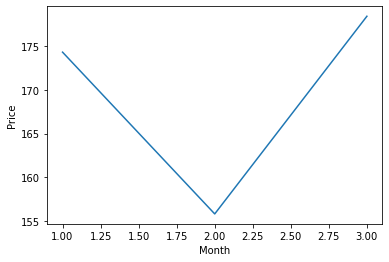

In [104]:
import matplotlib.pyplot as plt
monthly_price.plot()
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

### 7. Line plot

It's a very simple plot in this case, but you can imagine that with a much larger dataset, this plot could help you to understand the price trends in a way that examining the raw data could not.

### 8. Let's practice!

Now it's your turn to practice using datetime attributes and plots with our traffic stops dataset to analyze the relationship between time of day and arrest rate.

## Calculating the hourly arrest rate

<p>When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.</p>
<p>First, you'll calculate the arrest rate across all stops in the <code>ri</code> DataFrame. Then, you'll calculate the hourly arrest rate by using the <code>hour</code> attribute of the index. The <code>hour</code> ranges from 0 to 23, in which:</p>
<ul>
<li>0 = midnight</li>
<li>12 = noon</li>
<li>23 = 11 PM</li>
</ul>

In [105]:
print(ri["is_arrested"].mean())

0.0355690117407784


In [108]:
print(ri.groupby(ri.index.hour)["is_arrested"].mean())

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


In [112]:
hourly_arrest_rate = ri.groupby(ri.index.hour)["is_arrested"].mean()

## Plotting the hourly arrest rate

<p>In this exercise, you'll create a line plot from the <code>hourly_arrest_rate</code> object. A line plot is appropriate in this case because you're showing how a quantity changes over time.</p>
<p>This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!</p>

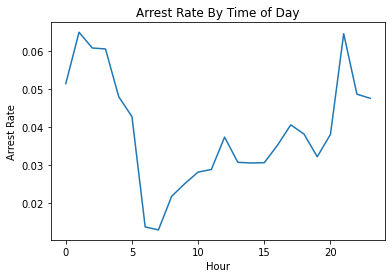

In [113]:

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate By Time of Day")

# Display the plot
plt.show()

## Are drug-related stops on the rise?

### 1. Are drug-related stops on the rise?

In the last section, we created a plot to help us see how a single variable changed over time. In this section, we'll use subplots to help us examine the relationship between two variables over time.

### 2. Resampling the price

Let's return to our DataFrame of Apple stock prices. In the last section, we calculated the mean price for each month using a groupby() operation. There's actually an alternative method, known as resampling, that we can use to accomplish the same task. As you might remember from previous courses, resampling is when you change the frequency of your time series observations. In this case, we'll resample the price column by month, represented by the capital letter M, and then chain the mean() method onto the end. The output is identical to the groupby() operation, except that the index consists of the last day of each month, rather than just the integers 1, 2, and 3.

In [115]:
apple.groupby(apple.index.month)["price"].mean()

date_and_time
1    174.34
2    155.78
3    178.46
Name: price, dtype: float64

In [117]:
apple["price"].resample("M").mean()


date_and_time
2018-01-31    174.34
2018-02-28    155.78
2018-03-31    178.46
Freq: M, Name: price, dtype: float64

### 3. Resampling the volume

As a reminder, the apple DataFrame also has a volume column that displays the number of Apple shares traded that day. Let's resample that column, to calculate the mean daily volume for each month. One thing worth noticing is that the output has the same index as the last resampling operation, since both price and volume were resampled at the same frequency.

In [118]:
apple["volume"].resample("M").mean()

date_and_time
2018-01-31    21075900.0
2018-02-28    62531550.0
2018-03-31    27979650.0
Freq: M, Name: volume, dtype: float64

### 4. Concatenating price and volume

Now that we've resampled both the price and volume data, we're going to combine the results into a single DataFrame so that we can study the relationship between price and volume. First, we'll save the two resampled Series as separate objects. One is called monthly_price and the other is called monthly_volume. Then, we'll combine these two objects using the concat() function, which concatenates pandas objects along a specified axis. In this case, we want them to be combined along the columns axis, meaning that we want them side-by-side. Notice that they aligned along their shared index. We'll save this new DataFrame as an object called monthly.

In [119]:
monthly_price  = apple["price"].resample("M").mean()
monthly_volume = apple["volume"].resample("M").mean()

monthly = pd.concat([monthly_price,monthly_volume],axis="columns")
monthly

,price,volume
date_and_time,,
2018-01-31,174.34,21075900.0
2018-02-28,155.78,62531550.0
2018-03-31,178.46,27979650.0


### 5. Plotting price and volume (1)

To visualize the relationship between price and volume, we simply call the plot() method on the monthly DataFrame. pandas outputs a single line plot in which each line represents one of the two columns. Because it's a single plot, the two lines are sharing both the x and y axes. It makes sense for the x-axis to be shared, since we want to compare price and volume by month. But sharing the y-axis is problematic, because price and volume are on such different scales: price is in the hundreds, and volume is in the tens of millions, represented by the 1e7 notation at the top of the y-axis. Because of the different scales, we can't actually see the price trend.

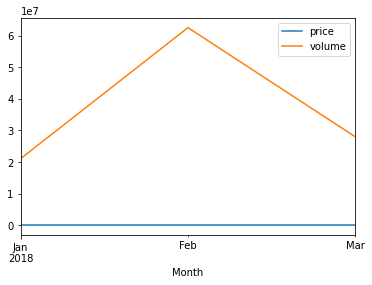

In [120]:
monthly.plot()
plt.xlabel("Month")
plt.show()

### 6. Plotting price and volume (2)

The solution to this problem is to set the subplots parameter to True, which results in two separate plots with independent y axes. Now we can clearly see the monthly trends for both price and volume. They appear to have an inverse relationship, though we wouldn't actually draw that conclusion without having a lot more data.

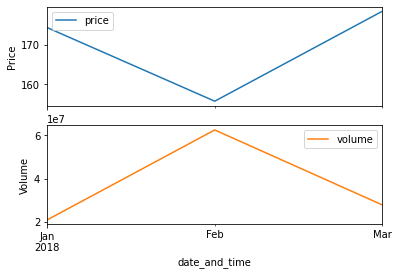

In [135]:
ax1,ax2 = monthly.plot(subplots =True)
ax1.set_ylabel("Price")
ax2.set_ylabel("Volume")
plt.show()

### 7. Let's practice!

Now it's time for you to practice resampling, concatenation, and subplots while you examine drug-related traffic stops in our dataset.

## Plotting drug-related stops

<p>In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.</p>
<p>The Boolean column <code>drugs_related_stop</code> indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.</p>

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


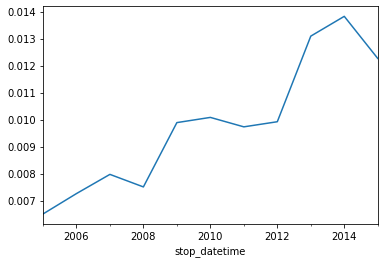

In [138]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample("A").mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample("A").mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

## Comparing drug and search rates

<p>As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.</p>
<p>You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.</p>

In [141]:
annual_search_rate = ri["search_conducted"].resample("A").mean()

In [142]:
annual_search_rate

stop_datetime
2005-12-31    0.049167
2006-12-31    0.041758
2007-12-31    0.044056
2008-12-31    0.040310
2009-12-31    0.049861
2010-12-31    0.044805
2011-12-31    0.035682
2012-12-31    0.033616
2013-12-31    0.030022
2014-12-31    0.031801
2015-12-31    0.028497
Freq: A-DEC, Name: search_conducted, dtype: float64

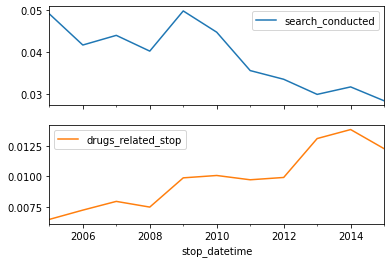

In [143]:
annual = pd.concat([annual_search_rate,annual_drug_rate],axis="columns")
annual.plot(subplots=True)
plt.show()

The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis

## What violations are caught in each district?

### 1. What violations are caught in each district?

In the last section, we saw how easy it is to create line plots directly from a DataFrame. Now, we're going to make different types of plots from DataFrames.

### 2. Computing a frequency table

One pandas function that might be new to you is crosstab(), short for cross-tabulation. To use crosstab(), you pass it two pandas Series that represent categories, and it outputs a frequency table in the form of a DataFrame. You can think of a frequency table as a tally of how many times each combination of values occurs in the dataset. In this case, we passed driver_race and driver_gender to crosstab(), and it tells us how many rows contain each combination of race and gender. For example, 551 Asian female drivers were stopped, which you can verify by filtering the DataFrame and checking the shape. Notice that race is along the index of the DataFrame and gender is along the columns, though you could transpose the DataFrame by reversing the order in which race and gender are passed to crosstab(). Let's go ahead and save the frequency table as an object called table.

In [145]:
tabel = pd.crosstab(ri.driver_race,ri.driver_gender)
tabel

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


In [147]:
ri[(ri["driver_gender"] == "F") & (ri["driver_race"] == "Asian")].shape

(551, 15)

### 3. Selecting a DataFrame slice

As you might recall from previous courses, the loc accessor allows you to select portions of a DataFrame by label. Given our frequency table, let's pretend we wanted to select the Asian through Hispanic rows only. Using loc, we can extract this slice of the DataFrame by specifying the starting and ending labels, separated by a colon. Let's overwrite our existing table object with this smaller DataFrame.

In [152]:
tabel = tabel.loc["Asian":"Hispanic"]
tabel

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


### 4. Creating a line plot

If we plot the table object, we'll get a line plot by default, in which the index is along the x-axis and each column becomes a line. However, a line plot is not appropriate in this case because it implies a change in time along the x-axis, whereas the x-axis actually represents three distinct categories.

<AxesSubplot:xlabel='driver_race'>

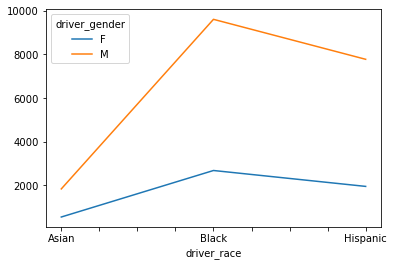

In [153]:
tabel.plot()

### 5. Creating a bar plot

By specifying kind equals bar, you can create a bar plot, which is much more appropriate than a line plot for comparing categorical data. With this plot, the numbers in our frequency table have been converted to bars for which the height represents the magnitude. Each gender has been assigned a color, and the two gender bars for each race are placed next to one another. The bar plot makes it especially easy to see the gender difference within each race. For all three races, we see that the number of males stopped is far greater than the number of females stopped.

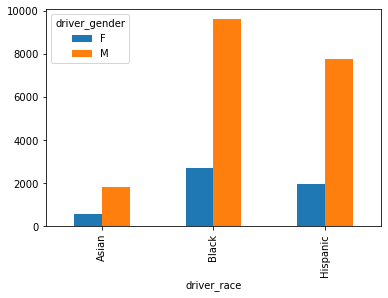

In [155]:
tabel.plot(kind="bar")
plt.show()

### 6. Stacking the bars

A variation of the bar plot is the stacked bar plot, which you can generate by adding the argument stacked equals True. For each race, the two gender bars are now stacked on top of one another. The strength of this plot is that it helps you to see the total stops for each race, which was not as obvious when the bars were side-by-side. By emphasizing the totals, however, this plot slightly deemphasizes the individual components of each bar, and makes those components harder to compare against one another. Neither type of bar plot is right or wrong, rather you should choose the plot that best helps to answer the question you're asking.

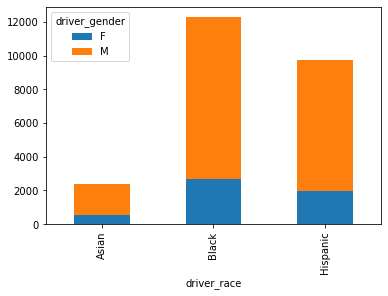

In [157]:
tabel.plot(kind="bar",stacked=True)
plt.show()

### 7. Let's practice!

It's your turn to practice these techniques while visualizing what violations are caught in each police district.

## Tallying violations by district

<p>The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?</p>
<p>In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.</p>

In [162]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri["district"],ri["violation"]))

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  


In [163]:

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri["district"],ri["violation"])

In [164]:

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc["Zone K1":"Zone K3"])

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  


In [165]:

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc["Zone K1":"Zone K3"]

## Plotting violations by district

<p>Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.</p>
<p>First you'll create a bar plot, which is an appropriate plot type since you're comparing categorical data. Then you'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?</p>

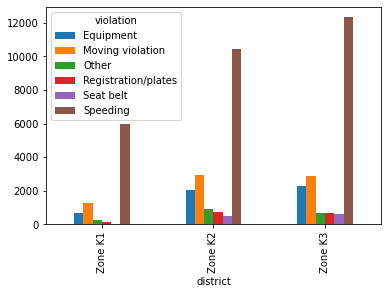

In [166]:
k_zones.plot(kind ="bar")
plt.show()

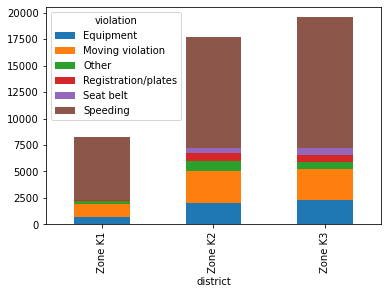

In [167]:
k_zones.plot(kind="bar",stacked=True)
plt.show()

## How long might you be stopped for a violation?

### 1. How long might you be stopped for a violation?

In this section, we'll start by learning how to translate strings into data that can be analyzed numerically, and then we'll learn a few easy ways to improve our plots.

### 2. Analyzing an object column

Let's return again to our DataFrame of Apple stock prices. A new column called change has been added to the DataFrame. It indicates whether the stock price went up or down compared to the previous trading day. Let's pretend we wanted to calculate how often the price went up. One way to do this would be to create a Boolean column that is True if the price went up, and False otherwise. Then we could easily calculate how often the price went up by taking the mean of the Boolean column. But how would we create this column? The change column has the object data type because it contains strings, and previously we've used the astype() method to convert strings to numbers or Booleans. However, astype() only works when pandas can infer how the conversion should be done, and that's not the case here. We'll need to find a different technique.

### 3. Mapping one set of values to another

When you need to map one set of values to another, you can use the Series map() method. You provide it with a dictionary that maps the values you currently have to the values that you want. In this case, we want to map "up" to True and "down" to False, so we'll create a dictionary called mapping that specifies this. Then, we'll use the map() method on the change column, pass it the mapping object, and store the result in a new column called is_up. When we print the DataFrame, you'll see that the is_up column contains True when the change column says up, and False when the change column says down. Now that we have a Boolean column, we can calculate how often the price went up by taking the mean() of that column. The answer is that it went up 50% of the time.


### 4. Calculating the search rate

Now we're going to return to our DataFrame of traffic stops, and shift to a completely separate topic. Let's say that we wanted to visualize how often searches were performed after each type of violation. We would group by violation, and then take the mean() of search_conducted. This calculates the search_rate for each of the six violation types, and returns a Series that is sorted in alphabetical order by violation. We'll save this as an object named search_rate.

In [168]:
ri.groupby("violation")["search_conducted"].mean()

violation
Equipment              0.064280
Moving violation       0.057014
Other                  0.045362
Registration/plates    0.093438
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64

In [170]:
search_rate = ri.groupby("violation")["search_conducted"].mean()

### 5. Creating a bar plot

To visualize the search rate, we'll create a bar plot since we're comparing the search rate across categories. The violations are displayed on the x-axis, and the search rate is on the y-axis. This plot looks okay, but there are two simple changes we can make that will make this plot more effective.

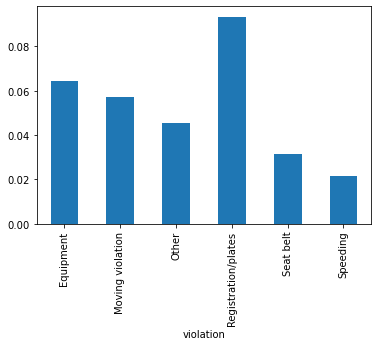

In [171]:
search_rate.plot(kind = "bar")
plt.show()

### 6. Ordering the bars (1)

The first improvement we can make is to order the bars from left to right by size, which will make the plot easier to understand. All we need to do is to use the sort_values() method to sort the search_rate Series in ascending order.

In [177]:
search_rate = search_rate.sort_values()
search_rate

violation
Speeding               0.021560
Seat belt              0.031513
Other                  0.045362
Moving violation       0.057014
Equipment              0.064280
Registration/plates    0.093438
Name: search_conducted, dtype: float64

### 7. Ordering the bars (2)

Then, when we call the plot method on the sorted data, the bars are now ordered. This makes it easy to see which violations have the highest and the lowest search rates.

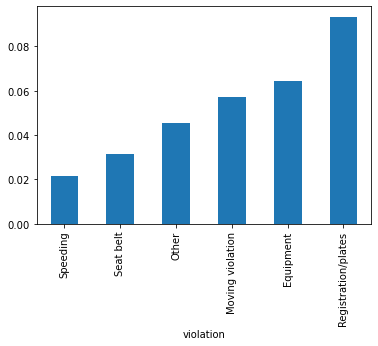

In [178]:
search_rate.plot(kind="bar")
plt.show()

### 8. Rotating the bars

The second improvement we can make is to change the kind argument from bar to barh, which will rotate the bars so that they're horizontal. This makes it much easier to read the labels for each bar.

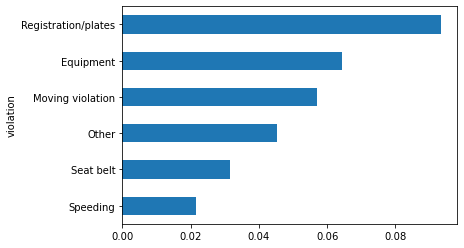

In [179]:
search_rate.plot(kind = "barh")
plt.show()

### 9. Let's practice!

Let's go ahead and get started with the last few exercises in this chapter.

## Converting stop durations to numbers

<p>In the traffic stops dataset, the <code>stop_duration</code> column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as <code>'0-15 Min'</code>. How can you make this data easier to analyze?</p>
<p>In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:</p>
<ul>
<li>Convert <code>'0-15 Min'</code> to <code>8</code></li>
<li>Convert <code>'16-30 Min'</code> to <code>23</code></li>
<li>Convert <code>'30+ Min'</code> to <code>45</code></li>
</ul>

In [180]:
ri["stop_duration"]

stop_datetime
2005-01-04 12:55:00     0-15 Min
2005-01-23 23:15:00     0-15 Min
2005-02-17 04:15:00     0-15 Min
2005-02-20 17:15:00    16-30 Min
2005-02-24 01:20:00     0-15 Min
                         ...    
2015-12-31 21:21:00     0-15 Min
2015-12-31 21:59:00     0-15 Min
2015-12-31 22:04:00     0-15 Min
2015-12-31 22:09:00     0-15 Min
2015-12-31 22:47:00     0-15 Min
Name: stop_duration, Length: 86536, dtype: object

In [181]:
mapping ={"0-15 Min":8,
          "16-30 Min":23,
          "30+ Min":45}


In [182]:
ri["stop_duration"].map(mapping)

stop_datetime
2005-01-04 12:55:00     8
2005-01-23 23:15:00     8
2005-02-17 04:15:00     8
2005-02-20 17:15:00    23
2005-02-24 01:20:00     8
                       ..
2015-12-31 21:21:00     8
2015-12-31 21:59:00     8
2015-12-31 22:04:00     8
2015-12-31 22:09:00     8
2015-12-31 22:47:00     8
Name: stop_duration, Length: 86536, dtype: int64

Print the unique values in the <code>stop_duration</code> column. (This has been done for you.)

In [186]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min']


Create a dictionary called <code>mapping</code> that maps the <code>stop_duration</code> strings to the specified integers.

In [183]:

# Create a dictionary that maps strings to integers
mapping ={"0-15 Min":8,
          "16-30 Min":23,
          "30+ Min":45}

Convert the <code>stop_duration</code> strings to integers using the <code>mapping</code>, and store the results in a new column called <code>stop_minutes</code>.

In [184]:

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

Print the unique values in the <code>stop_minutes</code> column, to verify that the durations were properly converted to integers.

In [185]:

# Print the unique values in 'stop_minutes'
print(ri["stop_minutes"].unique())

[ 8 23 45]


## Plotting stop length

<p>If you were stopped for a particular violation, how long might you expect to be detained?</p>
<p>In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the <code>violation</code> column in this exercise, you'll use <code>violation_raw</code> since it contains more detailed descriptions of the violations.</p>

In [189]:
ri["violation_raw"].unique()

array(['Equipment/Inspection Violation', 'Speeding', 'Call for Service',
       'Other Traffic Violation', 'Registration Violation',
       'Special Detail/Directed Patrol', 'APB',
       'Motorist Assist/Courtesy', 'Suspicious Person',
       'Violation of City/Town Ordinance', 'Warrant',
       'Seatbelt Violation'], dtype=object)

For each value in the <code>ri</code> DataFrame's <code>violation_raw</code> column, calculate the mean number of <code>stop_minutes</code> that a driver is detained.

In [190]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby("violation_raw")["stop_minutes"].mean())

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


Save the resulting Series as a new object, <code>stop_length</code>.

In [191]:

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby("violation_raw")["stop_minutes"].mean()

Sort <code>stop_length</code> by its values, and then visualize it using a horizontal bar plot.

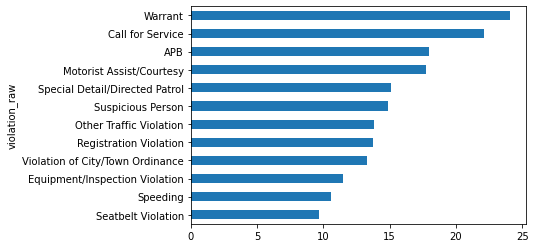

In [193]:

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind="barh")
# Display the plot
plt.show()

Display the plot.

# Analyzing the effect of weather on policing

## Exploring the weather dataset

### 1. Exploring the weather dataset

In the first three chapters, you analyzed a dataset of traffic stops from the state of Rhode Island. In this chapter, you'll be working with a new dataset to help you determine if weather conditions have an impact on police behavior.

### 2. Introduction to the dataset

The weather data you'll be using was collected by the National Centers for Environmental Information. Our hypothesis is that weather conditions impact police behavior during traffic stops, so ideally we would look up the historical weather at the location of each stop. However, the traffic stops dataset does not specify stop location, so we're going to use the data from a single weather station near the center of Rhode Island. This is not ideal, but Rhode Island is the smallest US state and so a single station will still give us a general idea of the weather throughout the state.

### 3. Examining the columns

Let's read the weather dataset into a DataFrame using read_csv(), and then look at the head. You can see that the station column lists the station ID, and there's one row for each date. There are three columns related to temperature, two columns related to wind speed, and 20 columns related to the presence of certain bad weather conditions.

In [195]:
weather = pd.read_csv("data/weather.csv")
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


### 4. Examining the wind speed

Before using a new dataset, it's a good practice to explore the data to check that the values seem reasonable. If you don't find anything unreasonable, then you gain increased confidence that the data is trustworthy. For example, let's take a look at the two columns related to wind speed. AWND is average wind speed in miles per hour, and WSF2 is the fastest 2-minute wind speed, meaning the fastest wind speed during any 2-minute period. We can use the describe() method on these two columns to see summary statistics including the minimum, maximum, and 25th through 75th percentiles. Notice that the minimum values are above zero, and the fastest wind speed values are greater than the average wind speed values. Also, the numbers seem reasonable given that they are measured in miles per hour. These are all simple signs that the data is trustworthy.

In [197]:
weather[["AWND","WSF2"]].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


### 5. Creating a box plot

Another way to examine these values is with a box plot, by specifying kind equals box when plotting. This is essentially a visual representation of the summary statistics, in that the box represents the 25th through 75th percentiles, and the lines below and above the box represent the minimum and maximum values, excluding the outliers represented by circles. Again, our goal here is simply to validate that the data looks reasonable.

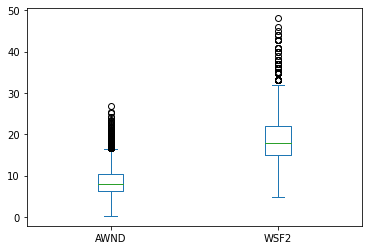

In [199]:
weather[["AWND","WSF2"]].plot(kind="box")
plt.show()

### 6. Creating a histogram (1)

It would also be useful to validate that the fastest wind speed values are greater than the average values for every single row. We'll do this by subtracting the average speed from the fastest speed and storing the results in a new column. We'll visualize the new column using a histogram so that we can see its distribution. There are no values below zero, which is a good sign. But because there are some extreme values, it's hard to clearly see the shape of the distribution.

<AxesSubplot:ylabel='Frequency'>

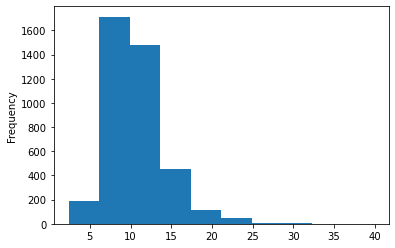

In [200]:
weather["WDIFF"] = weather["WSF2"] -weather["AWND"]
weather["WDIFF"].plot(kind="hist")

### 7. Creating a histogram (2)

We can make the shape more clear by changing the number of histogram bins to 20. This creates more narrow bins than the default value of 10. We can now see that the difference between the fastest and average wind speed values has an approximately normal shape. Many natural phenomena have a normal distribution, and so this shape is another sign that the dataset is trustworthy.

<AxesSubplot:ylabel='Frequency'>

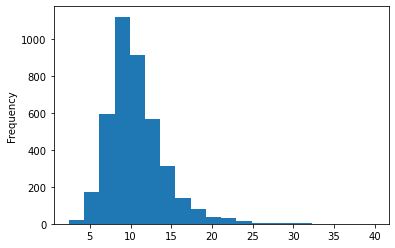

In [201]:
weather["WDIFF"].plot(kind="hist",bins=20)

### 8. Let's practice!

In the exercises, you'll explore the weather dataset further in order to verify that it's a reliable source.

## Plotting the temperature

<p>In this exercise, you'll examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a box plot.</p>
<p>When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!</p>

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


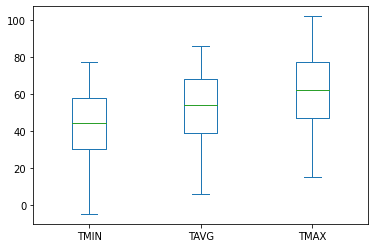

In [203]:


# Describe the temperature columns
print(weather[["TMIN","TAVG","TMAX"]].describe())

# Create a box plot of the temperature columns
weather[["TMIN","TAVG","TMAX"]].plot(kind='box')

# Display the plot
plt.show()

## Plotting the temperature difference

<p>In this exercise, you'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.</p>
<p>What do you notice about the resulting histogram? Does it match your expectations, or do you see anything unusual?</p>

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


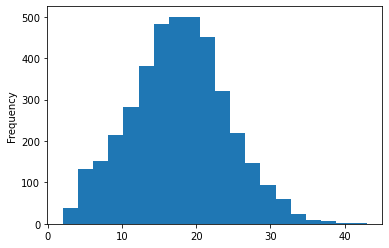

In [204]:
# Create a 'TDIFF' column that represents temperature difference
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]

# Describe the 'TDIFF' column
print(weather["TDIFF"].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather["TDIFF"].plot(kind="hist",bins=20)

# Display the plot
plt.show()

## Categorizing the weather

### 1. Categorizing the weather

Now that we've reviewed the weather dataset and concluded that it's a trustworthy source, we can start preparing it for analysis. But first, let's review a few pandas techniques we'll be using.

### 2. Selecting a DataFrame slice (1)

The weather DataFrame has 4,017 rows and 28 columns. Let's say that we wanted to copy the three temperature columns to a new DataFrame called temp. How might we do this?

In [205]:
weather.shape

(4017, 29)

### 3. Selecting a DataFrame slice (2)

You might recall that the loc accessor allows you to extract a DataFrame slice by specifying the starting and ending labels of your desired selection. In this case, we'll select all rows (represented by the first colon) and the columns TAVG through TMAX and save them to temp. You can see that the temp DataFrame contains all 4,017 rows but just 3 columns. This method is particularly useful when you need to select a large number of columns that are side-by-side.

In [208]:
temp = weather.loc[:,"TAVG":"TMAX"]
temp.head()

,TAVG,TMIN,TMAX
0,44.0,35,53
1,36.0,28,44
2,49.0,44,53
3,42.0,39,45
4,36.0,28,43


In [209]:
temp.shape

(4017, 3)

### 4. DataFrame operations

Let's take a look at the head of temp. What would happen if you used the sum() method on the DataFrame? pandas will actually return the sum of each of the three columns. But what if you wanted to calculate the sum of each row? You can do this by specifying axis equals columns, and you'll see that each value is the sum of the three temperature values in that row. You may find it confusing that specifying the columns axis leads pandas to calculate row sums. But for mathematical operations, the axis specifies the array dimension that is being aggregated, and aggregating the columns is how you combine the data for each row.

In [210]:
temp.sum()

TAVG     63884.0
TMIN    174677.0
TMAX    246116.0
dtype: float64

In [211]:
temp.sum(axis="columns")

0       132.0
1       108.0
2       146.0
3       126.0
4       107.0
        ...  
4012    156.0
4013    114.0
4014    101.0
4015     92.0
4016    124.0
Length: 4017, dtype: float64

### 5. Mapping one set of values to another

Let's return to the traffic stops dataset and the stop_duration column. You might remember that you can map one set of values to another using the Series map() method. In this case, we'll create a dictionary that maps the stop_duration values to the strings short, medium, and long. Then we'll use the map() method to create a column called stop_length. The stop_length column has the object data type since it contains string data.

In [212]:
ri["stop_duration"].unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [218]:
cat = ["short","medium","long"]

In [219]:
mapping = {k:v for k,v in zip(ri.stop_duration.unique(),cat)}
mapping

{'0-15 Min': 'short', '16-30 Min': 'medium', '30+ Min': 'long'}

In [220]:
ri["stop_length"] = ri["stop_duration"].map(mapping)


### 6. Changing data type from object to category (1)

Whenever you have an object column with a small number of possible values, as is the case here, you may want to change its data type to category. The main reason to use the category type is that it stores the data more efficiently than the object type. Another reason is that it allows you to specify a logical order for the categories. Before we change the data type of the stop_length Series, we'll use a Series method to calculate its current memory usage, which is about 6 megabytes.

In [221]:
ri["stop_length"].unique()


array(['short', 'medium', 'long'], dtype=object)

In [222]:
ri["stop_length"].dtype

dtype('O')

In [224]:
ri["stop_length"].memory_usage(deep=True)

6068041

### 7. Changing data type from object to category (2)

To change the data type, we first create a special pandas object called a CategoricalDtype. We pass it a Python list to define the logical order of the categories, and we specify that the categories should be treated as ordered. Then, we change the data type by passing the CategoricalDtype object to the astype() method. By changing the data type, you can see that the memory usage of this column has been reduced to less than 1 megabyte.

In [226]:
cat_type = pd.CategoricalDtype(cat,ordered=True)

In [227]:
ri["stop_length"] =ri["stop_length"].astype(cat_type)
ri["stop_length"].dtype

CategoricalDtype(categories=['short', 'medium', 'long'], ordered=True)

In [230]:
ri["stop_length"].memory_usage(deep=True)

779118

### 8. Using ordered categories (1)

Let's take a look at the head of this column. In the bottom two lines, you can see that the dtype is now category and the categories are ordered from short to long. Because of the ordering, you can now use comparison operators with this column.

In [229]:
ri["stop_length"].head()

stop_datetime
2005-01-04 12:55:00     short
2005-01-23 23:15:00     short
2005-02-17 04:15:00     short
2005-02-20 17:15:00    medium
2005-02-24 01:20:00     short
Name: stop_length, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

### 9. Using ordered categories (2)

For example, you can specify that stop_length is greater than short in order to filter the DataFrame to only include medium or long stops. In addition, pandas will automatically sort ordered categories logically rather than alphabetically, which can make the results of a calculation easier to understand.

In [231]:
ri[ri['stop_length'] > "short"].shape

(16959, 17)

In [232]:
ri.groupby("stop_length").is_arrested.mean()

stop_length
short     0.013654
medium    0.093595
long      0.261572
Name: is_arrested, dtype: float64

### 10. Let's practice!

It's your turn to practice these techniques while assigning a rating to weather conditions each day.

## Counting bad weather conditions

<p>The <code>weather</code> DataFrame contains 20 columns that start with <code>'WT'</code>, each of which represents a bad weather condition. For example:</p>
<ul>
<li><code>WT05</code> indicates "Hail"</li>
<li><code>WT11</code> indicates "High or damaging winds"</li>
<li><code>WT17</code> indicates "Freezing rain"</li>
</ul>
<p>For every row in the dataset, each <code>WT</code> column contains either a <code>1</code> (meaning the condition was present that day) or <code>NaN</code> (meaning the condition was not present).</p>
<p>In this exercise, you'll quantify "how bad" the weather was each day by counting the number of <code>1</code> values in each row.</p>

In [234]:
weather.head(3)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WDIFF,TDIFF
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.15,18
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,4.70,16
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,10.07,9


Copy the columns <code>WT01</code> through <code>WT22</code> from <code>weather</code> to a new DataFrame named <code>WT</code>.

In [237]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,"WT01":"WT22"]

Calculate the sum of each row in <code>WT</code>, and store the results in a new <code>weather</code> column named <code>bad_conditions</code>.

In [238]:

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis="columns")

Replace any missing values in <code>bad_conditions</code> with a <code>0</code>. (This has been done for you.)

In [239]:

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

Create a histogram to visualize <code>bad_conditions</code>, and then display the plot.

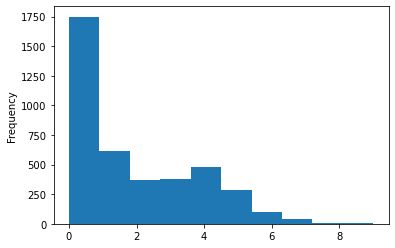

In [240]:

# Create a histogram to visualize 'bad_conditions'
weather["bad_conditions"].plot(kind="hist")

# Display the plot
plt.show()

## Rating the weather conditions

<p>In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a rating system for the weather.</p>
<p>The counts range from 0 to 9, and should be converted to ratings as follows:</p>
<ul>
<li>Convert <code>0</code> to <code>'good'</code></li>
<li>Convert <code>1</code> through <code>4</code> to <code>'bad'</code></li>
<li>Convert <code>5</code> through <code>9</code> to <code>'worse'</code></li>
</ul>

In [242]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:"bad",4:"bad",
           5:"worse",
           6:"worse",
           7:"worse",
           8:"worse",
           9:"worse"}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather["rating"].value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


## Changing the data type to category

<p>Since the <code>rating</code> column only has a few possible values, you'll change its data type to category in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.</p>

In [243]:
# Specify the logical order of the weather ratings
cats = pd.CategoricalDtype(["good","bad","worse"], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cats)

# Examine the head of 'rating'
print(weather["rating"].head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


## Merging datasets

### 1. Merging datasets

Now that we've assigned a rating to the weather conditions each day, we need to merge that data with the traffic stop data so that we can analyze the relationship between weather and police behavior. Let's review how to merge two DataFrames.

In [254]:
apple = pd.read_csv("data/apple_3.csv",index_col=0)
apple

,date,time,price
date_and_time,,,
2018-02-14 09:30:00,2/14/18,9:30,163.04
2018-02-14 16:00:00,2/14/18,16:00,167.37
2018-02-15 09:30:00,2/15/18,9:30,169.79
2018-02-15 16:00:00,2/15/18,16:00,172.99


In [255]:
high_low = pd.read_csv("data/high_low.csv",index_col=0)
high_low

,DATE,HIGH,LOW
0,2/14/18,167.54,162.88
1,2/15/18,173.09,169.00
2,2/16/18,174.82,171.77


### 2. Preparing the first DataFrame

We'll return to the DataFrame of Apple stock prices that we've used throughout the course. This time, the opening price at 9:30 AM and closing price at 4:00 PM are listed for each day in separate rows. Shortly, we're going to merge the apple DataFrame with another DataFrame. Because the index will be lost during the merge, we want to save it by moving it to a DataFrame column. We'll do this by using the reset_index() method and specifying that the operation should occur in place. You can see that date_and_time is now a DataFrame column, and the index is now the default integer index.

In [256]:
apple.reset_index(inplace=True)

In [257]:
apple

,date_and_time,date,time,price
0,2018-02-14 09:30:00,2/14/18,9:30,163.04
1,2018-02-14 16:00:00,2/14/18,16:00,167.37
2,2018-02-15 09:30:00,2/15/18,9:30,169.79
3,2018-02-15 16:00:00,2/15/18,16:00,172.99


### 3. Preparing the second DataFrame

The second DataFrame we're working with is called high_low, and it contains the highest and lowest prices the Apple stock reached each day. We'd like to include the high data in the apple DataFrame, which we can do by merging the DataFrames. For the merge operation, we only need two columns from high_low: the date column, since it's the column on which the DataFrames will be joined, and the high column, since it's the column of interest. Thus, we'll create a new DataFrame called high that only includes these two columns.

In [258]:
high = high_low[["DATE","HIGH"]]
high

,DATE,HIGH
0,2/14/18,167.54
1,2/15/18,173.09
2,2/16/18,174.82


### 4. Merging the DataFrames

To merge the apple and high DataFrames, we'll use the pd dot merge() function and save the result as apple_high. Let's review the five arguments. First, we specified the left and right DataFrames. Apple is defined as left and high is defined as right because we wanted to join the high DataFrame onto the apple DataFrame. Next, we specified the columns on which to join the DataFrames. Both DataFrames have a column containing the date, but we had to specify them separately because the column name is lowercase in the left DataFrame and uppercase in the right DataFrame. Finally, we specified the type of join. We used a left join in order to keep all of the rows from the left DataFrame regardless of whether there were matches in the right DataFrame.

In [260]:
apple_high = pd.merge(left=apple,right=high,
         left_on="date",right_on="DATE",
         how="left")
apple_high

,date_and_time,date,time,price,DATE,HIGH
0,2018-02-14 09:30:00,2/14/18,9:30,163.04,2/14/18,167.54
1,2018-02-14 16:00:00,2/14/18,16:00,167.37,2/14/18,167.54
2,2018-02-15 09:30:00,2/15/18,9:30,169.79,2/15/18,173.09
3,2018-02-15 16:00:00,2/15/18,16:00,172.99,2/15/18,173.09


### 5. Comparing the DataFrames

Let's compare the merged DataFrame with the original two DataFrames. The first four columns of apple_high are identical to apple. The data in the final two columns of apple_high came from the high DataFrame. Because the apple DataFrame contained two rows each from February 14 and 15, the high value of each of those dates appears twice in the apple_high DataFrame. But since the apple DataFrame did not contain any rows from February 16, the February 16 value from the high DataFrame was ignored.

### 6. Setting the index

Since the merge is complete, we'll set the date_and_time column as the index of the apple_high DataFrame. This replaces the default index and reduces the number of columns to five.

In [261]:
apple_high.set_index("date_and_time",inplace=True)

In [262]:
apple_high

,date,time,price,DATE,HIGH
date_and_time,,,,,
2018-02-14 09:30:00,2/14/18,9:30,163.04,2/14/18,167.54
2018-02-14 16:00:00,2/14/18,16:00,167.37,2/14/18,167.54
2018-02-15 09:30:00,2/15/18,9:30,169.79,2/15/18,173.09
2018-02-15 16:00:00,2/15/18,16:00,172.99,2/15/18,173.09


### 7. Let's practice!

In the exercises, you'll practice these skills while merging the weather and traffic stop datasets.

## Preparing the DataFrames

<p>In this exercise, you'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:</p>
<ol>
<li>With the <code>ri</code> DataFrame, you'll move the <code>stop_datetime</code> index to a column since the index will be lost during the merge.</li>
<li>With the <code>weather</code> DataFrame, you'll select the <code>DATE</code> and <code>rating</code> columns and put them in a new DataFrame.</li>
</ol>

Reset the index of the <code>ri</code> DataFrame.

In [263]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

Examine the head of <code>ri</code> to verify that <code>stop_datetime</code> is now a DataFrame column, and the index is now the default integer index.

In [264]:

# Examine the head of 'ri'
print(ri.head())

        stop_datetime   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_related_stop district  \
0       Citation

Create a new DataFrame named <code>weather_rating</code> that contains only the <code>DATE</code> and <code>rating</code> columns from the <code>weather</code> DataFrame.

In [265]:

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[["DATE","rating"]]

Examine the head of <code>weather_rating</code> to verify that it contains the proper columns.

In [266]:

# Examine the head of 'weather_rating'
print(weather_rating.head())

         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


## Merging the DataFrames

<p>In this exercise, you'll merge the <code>ri</code> and <code>weather_rating</code> DataFrames into a new DataFrame, <code>ri_weather</code>.</p>
<p>The DataFrames will be joined using the <code>stop_date</code> column from <code>ri</code> and the <code>DATE</code> column from <code>weather_rating</code>. Thankfully the date formatting matches exactly, which is not always the case!</p>
<p>Once the merge is complete, you'll set <code>stop_datetime</code> as the index, which is the column you saved in the previous exercise.</p>

Examine the shape of the <code>ri</code> DataFrame.

In [269]:
# Examine the shape of 'ri'
print(ri.shape)

(86536, 18)


Merge the <code>ri</code> and <code>weather_rating</code> DataFrames using a left join.

In [270]:

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

Examine the shape of <code>ri_weather</code> to confirm that it has two more columns but the same number of rows as <code>ri</code>.

In [271]:

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

(86536, 20)


Replace the index of <code>ri_weather</code> with the <code>stop_datetime</code> column.

In [272]:

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

## Does weather affect the arrest rate?

### 1. Does weather affect the arrest rate?

Now that we've merged the weather and traffic stop data, we can analyze the relationship between weather and police behavior.

### 2. Driver gender and vehicle searches

In a previous chapter, we investigated the relationship between driver gender and vehicle searches. First, we calculated the percentage of all stops that led to a search by taking the mean() of the Boolean Series search_conducted. This is called the search rate. Then, we compared the search rates for male and female drivers by using a groupby() on driver_gender before taking the mean() of search_conducted. We found that male drivers are searched more than twice as often as female drivers.

In [276]:
ri["search_conducted"].mean()

0.0382153092354627

In [275]:
ri.groupby("driver_gender")["search_conducted"].mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

### 3. Driver gender and vehicle searches

Finally, we added violation to the groupby() operation. Our hypothesis was that search rate varies by violation type, and the difference in search rate between males and females is perhaps because they tend to commit different violations. The results disproved our hypothesis, because the search rate is higher for males than for females across all violations. This doesn't prove a causal link between gender and vehicles searches, but it does show a correlation.

In [277]:
ri.groupby(["violation","driver_gender"])["search_conducted"].mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

### 4. Examining a multi-indexed Series

Let's save the results of the previous operation as new object called search_rate, and print it out again. What type of object is this? It may look like a DataFrame because of its structure, but it's actually a pandas Series that has a MultiIndex. Violation and driver_gender are not columns, rather they're the names of the index levels. You've seen the MultiIndex before in the context of a DataFrame. With a DataFrame, which is normally two dimensions, the MultiIndex adds a third dimension. With a Series, which is normally one dimension, the MultiIndex adds a second dimension.

In [278]:
search_rate = ri.groupby(["violation", "driver_gender"])["search_conducted"].mean()


In [279]:
type(search_rate)

pandas.core.series.Series

In [280]:
type(search_rate.index)

pandas.core.indexes.multi.MultiIndex

### 5. Working with a multi-indexed Series

Let's print out the search_rate Series again. Working with a multi-indexed Series is actually very similar to working with a DataFrame. You can think of the outer index level, violation, as the DataFrame rows, and the inner index level, driver_gender, as the DataFrame columns. For example, we can use the loc accessor to select the Equipment row. This returns the search rate by gender for equipment violations only. Or, we can specify the Equipment row and the Male column to select a particular value in the Series.

In [281]:
search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

In [283]:
search_rate["Equipment"]

driver_gender
F    0.039984
M    0.071496
Name: search_conducted, dtype: float64

In [282]:
search_rate["Equipment","M"]

0.07149643705463182

### 6. Converting a multi-indexed Series to a DataFrame

You might think that if a multi-indexed Series is similar to a DataFrame, then there should be a way to convert one to the other. In fact, if you unstack() the search_rate Series, it actually results in a DataFrame. This is a useful technique any time you have a Series with a MultiIndex, since you're probably more comfortable manipulating a DataFrame. You might also think that there should be an easy way to create this DataFrame without using a groupby and an unstack.

In [284]:
search_rate.unstack()

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [285]:
type(search_rate.unstack())

pandas.core.frame.DataFrame

### 7. Converting a multi-indexed Series to a DataFrame

In fact, you can use a pivot table to produce the exact same DataFrame. Violation is the index, driver_gender is the columns, and the mean of search_conducted is the values. Recall that mean() is the default aggregation function for a pivot table, but you can choose another function instead.

In [286]:
ri.pivot_table(index="violation",
               columns="driver_gender",
               values="search_conducted")

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


### 8. Let's practice!

In the exercises, you'll investigate the relationship between weather and arrest rate, and then you'll practice working with a multi-indexed Series.

## Comparing arrest rates by weather rating

<p>Do police officers arrest drivers more often when the weather is bad? Let's find out!</p>
<ul>
<li>First, you'll calculate the overall arrest rate.</li>
<li>Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.</li>
<li>Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.</li>
</ul>
<p>Since you previously defined a logical order for the weather categories, <code>good &lt; bad &lt; worse</code>, they will be sorted that way in the results.</p>

In [289]:
ri_weather["is_arrested"].mean()

0.0355690117407784

In [291]:
ri_weather.groupby("rating")["is_arrested"].mean()

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

In [292]:
ri_weather.groupby(["violation","rating"])["is_arrested"].mean()

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!

## Selecting from a multi-indexed Series

<p>The output of a single <code>.groupby()</code> operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:</p>
<ul>
<li>The outer index level is like the DataFrame rows.</li>
<li>The inner index level is like the DataFrame columns.</li>
</ul>
<p>In this exercise, you'll practice accessing data from a multi-indexed Series using the <code>.loc[]</code> accessor.</p>

In [294]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

In [295]:

# Print the 'arrest_rate' Series
print(arrest_rate)

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [296]:

# Print the arrest rate for moving violations in bad weather
print(arrest_rate["Moving violation","bad"])

0.05804964058049641


In [297]:

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate["Speeding"])

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


## Reshaping the arrest rate data

<p>In this exercise, you'll start by reshaping the <code>arrest_rate</code> Series into a DataFrame. This is a useful step when working with any multi-indexed Series, since it enables you to access the full range of DataFrame methods.</p>
<p>Then, you'll create the exact same DataFrame using a pivot table. This is a great example of how pandas often gives you more than one way to reach the same result!</p>

Unstack the <code>arrest_rate</code> Series to reshape it into a DataFrame.

In [298]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


Create the exact same DataFrame using a pivot table! Each of the three <code>.pivot_table()</code> parameters should be specified as one of the <code>ri_weather</code> columns.

In [299]:

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


## Conclusion

### 1. Conclusion

Congratulations! You've now completed this course. Throughout the course, you used your pandas knowledge to prepare and analyze a dataset from start to finish. You practiced cleaning messy data, creating visualizations, answering questions about the data, and so much more.

### 2. Stanford Open Policing Project

You've built a great foundation of pandas knowledge, but there's a lot more to learn. The best way to improve your skills is to practice answering questions using data. For example, you can download the traffic stop data for Rhode Island and 30 other states from the Stanford Open Policing Project's website. There are many more interesting questions you can answer using this data.

### 3. Thank you!

Thank you so much for joining me. Best of luck to you in your data science career, and I hope to see you again in the future.